In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from bayesianmm.data import mean_match
from bayesianmm.visualize import draw

from graphical_model_learning import igsp
import conditional_independence as ci

In [37]:
p = 10
problem = mean_match(nnodes=p, sigma_square=.1*np.ones(p), S=5, DAG_type='random')

In [38]:
# observational data
a = np.zeros((problem.nnodes,1))
obs_data = problem.sample(a,1000)[0].T

In [39]:
# interventional data
A = [np.random.uniform(-1,1,(problem.nnodes,1)) for _ in range(2)]
target_list = [np.argwhere(abs(a).flatten() > .1).flatten().tolist() for a in A]	# thresholding intervention to get targets
int_data = [problem.sample(a,1000)[0].T for a in A]

In [40]:
ci_suff = ci.partial_correlation_suffstat(obs_data)
inv_suff = ci.gauss_invariance_suffstat(obs_data, int_data)

ci_tester = ci.MemoizedCI_Tester(ci.partial_correlation_test, ci_suff, alpha=1e-3)
inv_tester = ci.MemoizedInvarianceTester(ci.gauss_invariance_test, inv_suff, alpha=1e-3)

setting_list = [dict(interventions=targets) for targets in target_list]

est_dag = igsp(setting_list, p, ci_tester, inv_tester)

there are no undirected edges
plotting...


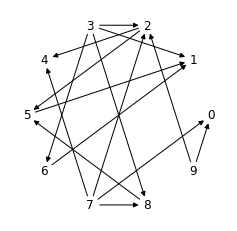

In [41]:
draw(problem.DAG)

there are no undirected edges
plotting...


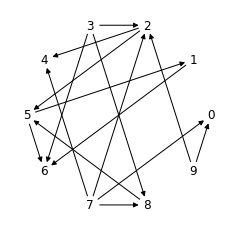

In [42]:
draw(est_dag)